In [2]:
# code written by Fernando Campos (fcampos@cicese.edu.mx)
import numpy as np
import gsw
import matplotlib.pyplot as plt
import pandas as pd
import glob

## datos 2018

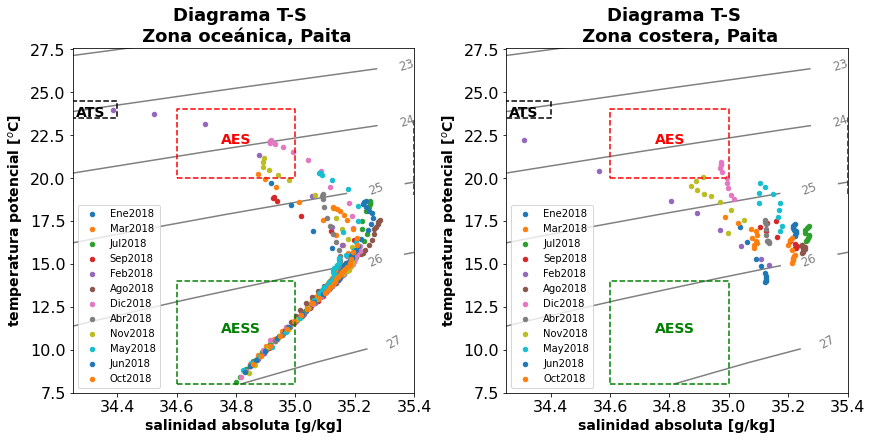

In [60]:
file = glob.glob("./Paita2018/*")

Tg, Sg = np.meshgrid(np.linspace(8, 29, num=18), np.linspace(33.5, 36, num=25))
sigma_theta = gsw.sigma0(Sg, Tg)
cnt = np.linspace(sigma_theta.min(), sigma_theta.max(),156)
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,6), constrained_layout=True)

cs = ax1.contour(Sg, Tg, sigma_theta, colors="grey", zorder=1)
ax1.clabel(cs, inline=True, fontsize=12)
ax1.set_title("Diagrama T-S \n Zona oceánica, Paita", fontsize=18, fontweight="bold")
ax1.set_xlabel("salinidad absoluta [g/kg]", fontweight="bold", size=14)
ax1.set_ylabel("temperatura potencial [$^{o}$C]", fontweight="bold", size=14)
ax1.tick_params(axis="both", labelsize=16)
ax1.plot([33.5, 34.4, 34.4, 33.5, 33.5],[23.5, 23.5, 24.5, 24.5, 23.5],"k--")    
ax1.plot([34.6, 35, 35, 34.6, 34.6],[20, 20, 24, 24, 20],"r--")
ax1.plot([35.4, 40, 40, 35.4, 35.4],[19, 19, 23.5, 23.5, 19],"b--")
ax1.plot([34.6, 35, 35, 34.6, 34.6],[8, 8, 14, 14, 8],"g--")
ax1.set_xlim(34.25,35.4)
ax1.set_ylim(7.5,27.6)
ax1.text(34.26,23.6,"ATS",fontsize=14, fontweight="bold", color="k")
ax1.text(34.75,22,"AES",fontsize=14, fontweight="bold", color="r")
ax1.text(34.75,11,"AESS",fontsize=14, fontweight="bold", color="g")

cs = ax2.contour(Sg, Tg, sigma_theta, colors="grey", zorder=1)
ax2.clabel(cs, inline=True, fontsize=12)
ax2.set_title("Diagrama T-S \n Zona costera, Paita", fontsize=18, fontweight="bold")
ax2.set_xlabel("salinidad absoluta [g/kg]", fontweight="bold", size=14)
ax2.set_ylabel("temperatura potencial [$^{o}$C]", fontweight="bold", size=14)
ax2.tick_params(axis="both", labelsize=16)
ax2.plot([33.5, 34.4, 34.4, 33.5, 33.5],[23.5, 23.5, 24.5, 24.5, 23.5],"k--")    
ax2.plot([34.6, 35, 35, 34.6, 34.6],[20, 20, 24, 24, 20],"r--")
ax2.plot([35.4, 40, 40, 35.4, 35.4],[19, 19, 23.5, 23.5, 19],"b--")
ax2.plot([34.6, 35, 35, 34.6, 34.6],[8, 8, 14, 14, 8],"g--")
ax2.set_xlim(34.25,35.4)
ax2.set_ylim(7.5,27.6)
ax2.text(34.26,23.6,"ATS",fontsize=14, fontweight="bold", color="k")
ax2.text(34.75,22,"AES",fontsize=14, fontweight="bold", color="r")
ax2.text(34.75,11,"AESS",fontsize=14, fontweight="bold", color="g")

for j in range(len(file)):
    excel_data = pd.read_excel(file[j]) # load excel data
    data = pd.DataFrame(excel_data, columns=["Prof", "T Pot", "SalAbs"]) #read specyfic variables
    adata = data.to_numpy() # passing to numpy ndarray
    val = np.where(adata[:,0] == 0)[0] # choosing 0-index
    num = sum(adata[:,0] == 0) # number of 0s
    ntemp = np.zeros((40,num))*np.nan # creating a nan-array for temperature
    nsalt = np.zeros((40,num))*np.nan # creating a nan-array for salinity
    
    for i in range(num):
        if i != num-1:
            n = len(adata[val[i]:val[i+1]-1,0])
            ntemp[0:n,i] = adata[val[i]:val[i+1]-1,1]
            nsalt[0:n,i] = adata[val[i]:val[i+1]-1,2]
        else:
            n = len(adata[val[i]:,0])
            ntemp[0:n,i] = adata[val[i]:,1]
            nsalt[0:n,i] = adata[val[i]:,2]
    temp_oce = np.mean(ntemp[:,:4],axis=1)
    temp_cos = np.mean(ntemp[:,-2:],axis=1)
    salt_oce = np.mean(nsalt[:,:4],axis=1)
    salt_cos = np.mean(nsalt[:,-2:],axis=1)
    
    ax1.scatter(salt_oce, temp_oce, s = 20, label=str(file[j][17:24]))
    ax1.legend(loc = "lower left")

    ax2.scatter(salt_cos, temp_cos, s = 20, label=str(file[j][17:24]))
    ax2.legend(loc = "lower left")

plt.savefig("./TS_diagram_Paita_2018.png", dpi=200)

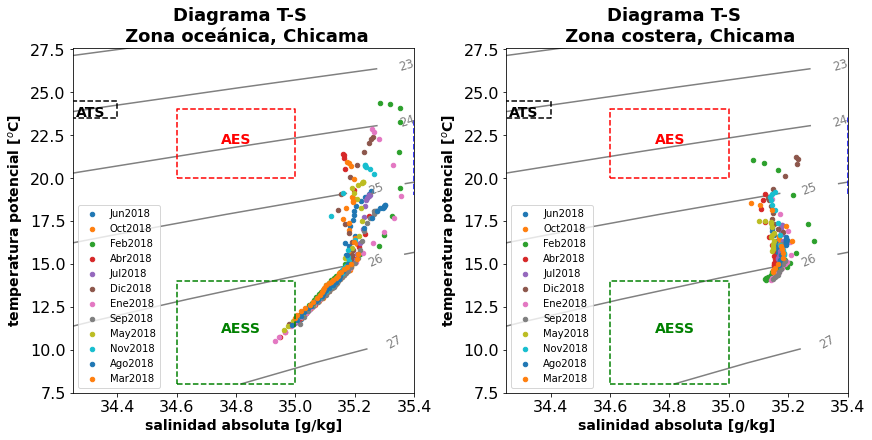

In [61]:
file = glob.glob("./Chicama2018/*")

Tg, Sg = np.meshgrid(np.linspace(8, 29, num=18), np.linspace(33.5, 36, num=25))
sigma_theta = gsw.sigma0(Sg, Tg)
cnt = np.linspace(sigma_theta.min(), sigma_theta.max(),156)
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,6), constrained_layout=True)

cs = ax1.contour(Sg, Tg, sigma_theta, colors="grey", zorder=1)
ax1.clabel(cs, inline=True, fontsize=12)
ax1.set_title("Diagrama T-S \n Zona oceánica, Chicama", fontsize=18, fontweight="bold")
ax1.set_xlabel("salinidad absoluta [g/kg]", fontweight="bold", size=14)
ax1.set_ylabel("temperatura potencial [$^{o}$C]", fontweight="bold", size=14)
ax1.tick_params(axis="both", labelsize=16)
ax1.plot([33.5, 34.4, 34.4, 33.5, 33.5],[23.5, 23.5, 24.5, 24.5, 23.5],"k--")    
ax1.plot([34.6, 35, 35, 34.6, 34.6],[20, 20, 24, 24, 20],"r--")
ax1.plot([35.4, 40, 40, 35.4, 35.4],[19, 19, 23.5, 23.5, 19],"b--")
ax1.plot([34.6, 35, 35, 34.6, 34.6],[8, 8, 14, 14, 8],"g--")
ax1.set_xlim(34.25,35.4)
ax1.set_ylim(7.5,27.6)
ax1.text(34.26,23.6,"ATS",fontsize=14, fontweight="bold", color="k")
ax1.text(34.75,22,"AES",fontsize=14, fontweight="bold", color="r")
ax1.text(34.75,11,"AESS",fontsize=14, fontweight="bold", color="g")

cs = ax2.contour(Sg, Tg, sigma_theta, colors="grey", zorder=1)
ax2.clabel(cs, inline=True, fontsize=12)
ax2.set_title("Diagrama T-S \n Zona costera, Chicama", fontsize=18, fontweight="bold")
ax2.set_xlabel("salinidad absoluta [g/kg]", fontweight="bold", size=14)
ax2.set_ylabel("temperatura potencial [$^{o}$C]", fontweight="bold", size=14)
ax2.tick_params(axis="both", labelsize=16)
ax2.plot([33.5, 34.4, 34.4, 33.5, 33.5],[23.5, 23.5, 24.5, 24.5, 23.5],"k--")    
ax2.plot([34.6, 35, 35, 34.6, 34.6],[20, 20, 24, 24, 20],"r--")
ax2.plot([35.4, 40, 40, 35.4, 35.4],[19, 19, 23.5, 23.5, 19],"b--")
ax2.plot([34.6, 35, 35, 34.6, 34.6],[8, 8, 14, 14, 8],"g--")
ax2.set_xlim(34.25,35.4)
ax2.set_ylim(7.5,27.6)
ax2.text(34.26,23.6,"ATS",fontsize=14, fontweight="bold", color="k")
ax2.text(34.75,22,"AES",fontsize=14, fontweight="bold", color="r")
ax2.text(34.75,11,"AESS",fontsize=14, fontweight="bold", color="g")

for j in range(len(file)):
    excel_data = pd.read_excel(file[j]) # load excel data
    data = pd.DataFrame(excel_data, columns=["Prof", "T Pot", "SalAbs"]) #read specyfic variables
    adata = data.to_numpy() # passing to numpy ndarray
    val = np.where(adata[:,0] == 0)[0] # choosing 0-index
    num = sum(adata[:,0] == 0) # number of 0s
    ntemp = np.zeros((40,num))*np.nan # creating a nan-array for temperature
    nsalt = np.zeros((40,num))*np.nan # creating a nan-array for salinity
    
    for i in range(num):
        if i != num-1:
            n = len(adata[val[i]:val[i+1]-1,0])
            ntemp[0:n,i] = adata[val[i]:val[i+1]-1,1]
            nsalt[0:n,i] = adata[val[i]:val[i+1]-1,2]
        else:
            n = len(adata[val[i]:,0])
            ntemp[0:n,i] = adata[val[i]:,1]
            nsalt[0:n,i] = adata[val[i]:,2]
    #print(ntemp[:,-2:])
    temp_oce = np.mean(ntemp[:,:3],axis=1)
    temp_cos = np.mean(ntemp[:,-2:],axis=1)
    salt_oce = np.mean(nsalt[:,:3],axis=1)
    salt_cos = np.mean(nsalt[:,-2:],axis=1)
    
    ax1.scatter(salt_oce, temp_oce, s = 20, label=str(file[j][21:28]))
    ax1.legend(loc = "lower left")

    ax2.scatter(salt_cos, temp_cos, s = 20, label=str(file[j][21:28]))
    ax2.legend(loc = "lower left")

plt.savefig("./TS_diagram_Chicama_2018.png", dpi=200)

## datos 2017

/home/user/miniconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/user/miniconda3/lib/python3.9/site-packages/numpy/core/_methods.py:182: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


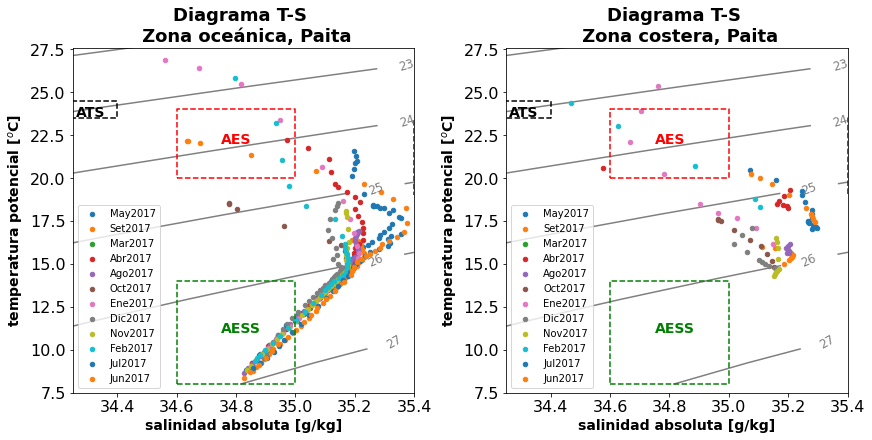

In [63]:
file = glob.glob("./Resultados_Paita2017/*")

Tg, Sg = np.meshgrid(np.linspace(8, 29, num=18), np.linspace(33.5, 36, num=25))
sigma_theta = gsw.sigma0(Sg, Tg)
cnt = np.linspace(sigma_theta.min(), sigma_theta.max(),156)
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,6), constrained_layout=True)

cs = ax1.contour(Sg, Tg, sigma_theta, colors="grey", zorder=1)
ax1.clabel(cs, inline=True, fontsize=12)
ax1.set_title("Diagrama T-S \n Zona oceánica, Paita", fontsize=18, fontweight="bold")
ax1.set_xlabel("salinidad absoluta [g/kg]", fontweight="bold", size=14)
ax1.set_ylabel("temperatura potencial [$^{o}$C]", fontweight="bold", size=14)
ax1.tick_params(axis="both", labelsize=16)
ax1.plot([33.5, 34.4, 34.4, 33.5, 33.5],[23.5, 23.5, 24.5, 24.5, 23.5],"k--")    
ax1.plot([34.6, 35, 35, 34.6, 34.6],[20, 20, 24, 24, 20],"r--")
ax1.plot([35.4, 40, 40, 35.4, 35.4],[19, 19, 23.5, 23.5, 19],"b--")
ax1.plot([34.6, 35, 35, 34.6, 34.6],[8, 8, 14, 14, 8],"g--")
ax1.set_xlim(34.25,35.4)
ax1.set_ylim(7.5,27.6)
ax1.text(34.26,23.6,"ATS",fontsize=14, fontweight="bold", color="k")
ax1.text(34.75,22,"AES",fontsize=14, fontweight="bold", color="r")
ax1.text(34.75,11,"AESS",fontsize=14, fontweight="bold", color="g")

cs = ax2.contour(Sg, Tg, sigma_theta, colors="grey", zorder=1)
ax2.clabel(cs, inline=True, fontsize=12)
ax2.set_title("Diagrama T-S \n Zona costera, Paita", fontsize=18, fontweight="bold")
ax2.set_xlabel("salinidad absoluta [g/kg]", fontweight="bold", size=14)
ax2.set_ylabel("temperatura potencial [$^{o}$C]", fontweight="bold", size=14)
ax2.tick_params(axis="both", labelsize=16)
ax2.plot([33.5, 34.4, 34.4, 33.5, 33.5],[23.5, 23.5, 24.5, 24.5, 23.5],"k--")    
ax2.plot([34.6, 35, 35, 34.6, 34.6],[20, 20, 24, 24, 20],"r--")
ax2.plot([35.4, 40, 40, 35.4, 35.4],[19, 19, 23.5, 23.5, 19],"b--")
ax2.plot([34.6, 35, 35, 34.6, 34.6],[8, 8, 14, 14, 8],"g--")
ax2.set_xlim(34.25,35.4)
ax2.set_ylim(7.5,27.6)
ax2.text(34.26,23.6,"ATS",fontsize=14, fontweight="bold", color="k")
ax2.text(34.75,22,"AES",fontsize=14, fontweight="bold", color="r")
ax2.text(34.75,11,"AESS",fontsize=14, fontweight="bold", color="g")

for j in range(len(file)):
    excel_data = pd.read_excel(file[j]) # load excel data
    data = pd.DataFrame(excel_data, columns=["Prof", "T Pot", "SalAbs"]) #read specyfic variables
    adata = data.to_numpy() # passing to numpy ndarray
    val = np.where(adata[:,0] == 0)[0] # choosing 0-index
    num = sum(adata[:,0] == 0) # number of 0s
    ntemp = np.zeros((40,num))*np.nan # creating a nan-array for temperature
    nsalt = np.zeros((40,num))*np.nan # creating a nan-array for salinity
    
    for i in range(num):
        if i != num-1:
            n = len(adata[val[i]:val[i+1]-1,0])
            ntemp[0:n,i] = adata[val[i]:val[i+1]-1,1]
            nsalt[0:n,i] = adata[val[i]:val[i+1]-1,2]
        else:
            n = len(adata[val[i]:,0])
            ntemp[0:n,i] = adata[val[i]:,1]
            nsalt[0:n,i] = adata[val[i]:,2]
    #print(ntemp[:,-4:]) 
    #print(file[j])
    #print(data)
    temp_cos = np.mean(ntemp[:,:2],axis=1)
    temp_oce = np.mean(ntemp[:,-4:],axis=1)
    salt_cos = np.mean(nsalt[:,:2],axis=1)
    salt_oce = np.mean(nsalt[:,-4:],axis=1)
    
    ax1.scatter(salt_oce, temp_oce, s = 20, label=str(file[j][28:35]))
    ax1.legend(loc = "lower left")

    ax2.scatter(salt_cos, temp_cos, s = 20, label=str(file[j][28:35]))
    ax2.legend(loc = "lower left")

plt.savefig("./TS_diagram_Paita_2017.png", dpi=200)

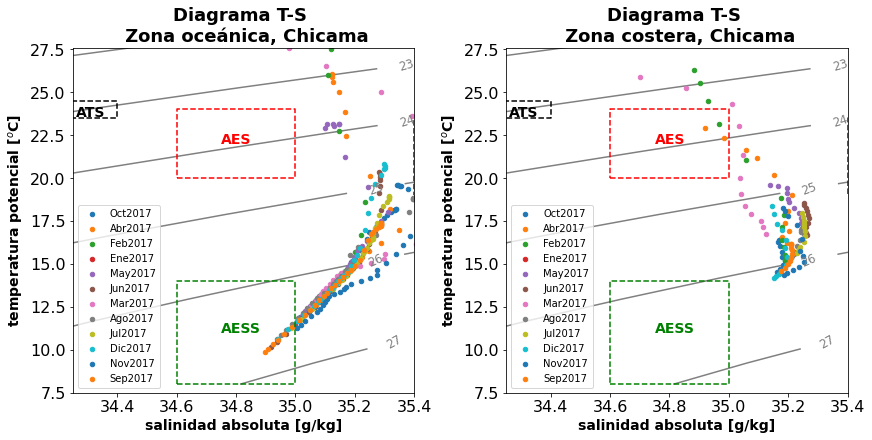

In [62]:
file = glob.glob("./Resultados_Chicama2017/*")

Tg, Sg = np.meshgrid(np.linspace(8, 29, num=18), np.linspace(33.5, 36, num=25))
sigma_theta = gsw.sigma0(Sg, Tg)
cnt = np.linspace(sigma_theta.min(), sigma_theta.max(),156)
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,6), constrained_layout=True)

cs = ax1.contour(Sg, Tg, sigma_theta, colors="grey", zorder=1)
ax1.clabel(cs, inline=True, fontsize=12)
ax1.set_title("Diagrama T-S \n Zona oceánica, Chicama", fontsize=18, fontweight="bold")
ax1.set_xlabel("salinidad absoluta [g/kg]", fontweight="bold", size=14)
ax1.set_ylabel("temperatura potencial [$^{o}$C]", fontweight="bold", size=14)
ax1.tick_params(axis="both", labelsize=16)
ax1.plot([33.5, 34.4, 34.4, 33.5, 33.5],[23.5, 23.5, 24.5, 24.5, 23.5],"k--")    
ax1.plot([34.6, 35, 35, 34.6, 34.6],[20, 20, 24, 24, 20],"r--")
ax1.plot([35.4, 40, 40, 35.4, 35.4],[19, 19, 23.5, 23.5, 19],"b--")
ax1.plot([34.6, 35, 35, 34.6, 34.6],[8, 8, 14, 14, 8],"g--")
ax1.set_xlim(34.25,35.4)
ax1.set_ylim(7.5,27.6)
ax1.text(34.26,23.6,"ATS",fontsize=14, fontweight="bold", color="k")
ax1.text(34.75,22,"AES",fontsize=14, fontweight="bold", color="r")
ax1.text(34.75,11,"AESS",fontsize=14, fontweight="bold", color="g")

cs = ax2.contour(Sg, Tg, sigma_theta, colors="grey", zorder=1)
ax2.clabel(cs, inline=True, fontsize=12)
ax2.set_title("Diagrama T-S \n Zona costera, Chicama", fontsize=18, fontweight="bold")
ax2.set_xlabel("salinidad absoluta [g/kg]", fontweight="bold", size=14)
ax2.set_ylabel("temperatura potencial [$^{o}$C]", fontweight="bold", size=14)
ax2.tick_params(axis="both", labelsize=16)
ax2.plot([33.5, 34.4, 34.4, 33.5, 33.5],[23.5, 23.5, 24.5, 24.5, 23.5],"k--")    
ax2.plot([34.6, 35, 35, 34.6, 34.6],[20, 20, 24, 24, 20],"r--")
ax2.plot([35.4, 40, 40, 35.4, 35.4],[19, 19, 23.5, 23.5, 19],"b--")
ax2.plot([34.6, 35, 35, 34.6, 34.6],[8, 8, 14, 14, 8],"g--")
ax2.set_xlim(34.25,35.4)
ax2.set_ylim(7.5,27.6)
ax2.text(34.26,23.6,"ATS",fontsize=14, fontweight="bold", color="k")
ax2.text(34.75,22,"AES",fontsize=14, fontweight="bold", color="r")
ax2.text(34.75,11,"AESS",fontsize=14, fontweight="bold", color="g")

for j in range(len(file)):
    excel_data = pd.read_excel(file[j]) # load excel data
    data = pd.DataFrame(excel_data, columns=["Prof", "T Pot", "SalAbs"]) #read specyfic variables
    adata = data.to_numpy() # passing to numpy ndarray
    val = np.where(adata[:,0] == 0)[0] # choosing 0-index
    num = sum(adata[:,0] == 0) # number of 0s
    ntemp = np.zeros((40,num))*np.nan # creating a nan-array for temperature
    nsalt = np.zeros((40,num))*np.nan # creating a nan-array for salinity
    
    for i in range(num):
        if i != num-1:
            n = len(adata[val[i]:val[i+1]-1,0])
            ntemp[0:n,i] = adata[val[i]:val[i+1]-1,1]
            nsalt[0:n,i] = adata[val[i]:val[i+1]-1,2]
        else:
            n = len(adata[val[i]:,0])
            ntemp[0:n,i] = adata[val[i]:,1]
            nsalt[0:n,i] = adata[val[i]:,2]
    #print(ntemp[:,-3:])
    temp_cos = np.mean(ntemp[:,:3],axis=1)
    temp_oce = np.mean(ntemp[:,-3:],axis=1)
    salt_cos = np.mean(nsalt[:,:3],axis=1)
    salt_oce = np.mean(nsalt[:,-3:],axis=1)
    
    ax1.scatter(salt_oce, temp_oce, s = 20, label=str(file[j][32:39]))
    ax1.legend(loc = "lower left")

    ax2.scatter(salt_cos, temp_cos, s = 20, label=str(file[j][32:39]))
    ax2.legend(loc = "lower left")

plt.savefig("./TS_diagram_Chicama_2017.png", dpi=200)

## datos 2019 

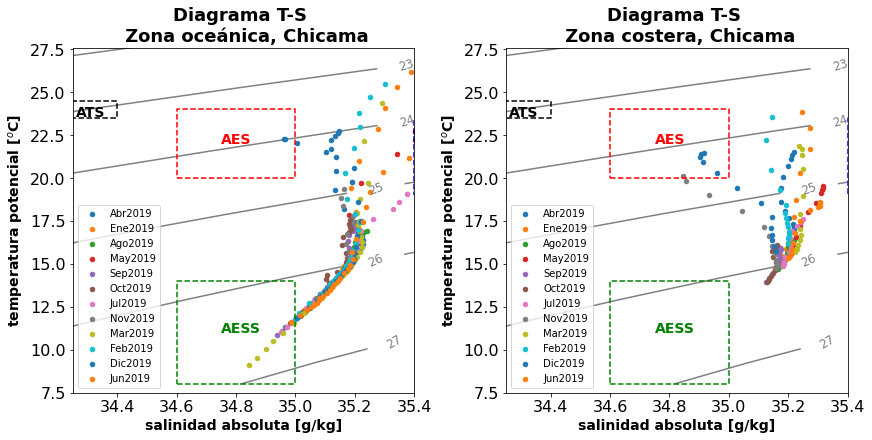

In [59]:
file = glob.glob("./Resultados_Chicama_2019/*")

Tg, Sg = np.meshgrid(np.linspace(8, 29, num=18), np.linspace(33.5, 36, num=25))
sigma_theta = gsw.sigma0(Sg, Tg)
cnt = np.linspace(sigma_theta.min(), sigma_theta.max(),156)
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,6), constrained_layout=True)

cs = ax1.contour(Sg, Tg, sigma_theta, colors="grey", zorder=1)
ax1.clabel(cs, inline=True, fontsize=12)
ax1.set_title("Diagrama T-S \n Zona oceánica, Chicama", fontsize=18, fontweight="bold")
ax1.set_xlabel("salinidad absoluta [g/kg]", fontweight="bold", size=14)
ax1.set_ylabel("temperatura potencial [$^{o}$C]", fontweight="bold", size=14)
ax1.tick_params(axis="both", labelsize=16)
ax1.plot([33.5, 34.4, 34.4, 33.5, 33.5],[23.5, 23.5, 24.5, 24.5, 23.5],"k--")    
ax1.plot([34.6, 35, 35, 34.6, 34.6],[20, 20, 24, 24, 20],"r--")
ax1.plot([35.4, 40, 40, 35.4, 35.4],[19, 19, 23.5, 23.5, 19],"b--")
ax1.plot([34.6, 35, 35, 34.6, 34.6],[8, 8, 14, 14, 8],"g--")
ax1.set_xlim(34.25,35.4)
ax1.set_ylim(7.5,27.6)
ax1.text(34.26,23.6,"ATS",fontsize=14, fontweight="bold", color="k")
ax1.text(34.75,22,"AES",fontsize=14, fontweight="bold", color="r")
ax1.text(34.75,11,"AESS",fontsize=14, fontweight="bold", color="g")

cs = ax2.contour(Sg, Tg, sigma_theta, colors="grey", zorder=1)
ax2.clabel(cs, inline=True, fontsize=12)
ax2.set_title("Diagrama T-S \n Zona costera, Chicama", fontsize=18, fontweight="bold")
ax2.set_xlabel("salinidad absoluta [g/kg]", fontweight="bold", size=14)
ax2.set_ylabel("temperatura potencial [$^{o}$C]", fontweight="bold", size=14)
ax2.tick_params(axis="both", labelsize=16)
ax2.plot([33.5, 34.4, 34.4, 33.5, 33.5],[23.5, 23.5, 24.5, 24.5, 23.5],"k--")    
ax2.plot([34.6, 35, 35, 34.6, 34.6],[20, 20, 24, 24, 20],"r--")
ax2.plot([35.4, 40, 40, 35.4, 35.4],[19, 19, 23.5, 23.5, 19],"b--")
ax2.plot([34.6, 35, 35, 34.6, 34.6],[8, 8, 14, 14, 8],"g--")
ax2.set_xlim(34.25,35.4)
ax2.set_ylim(7.5,27.6)
ax2.text(34.26,23.6,"ATS",fontsize=14, fontweight="bold", color="k")
ax2.text(34.75,22,"AES",fontsize=14, fontweight="bold", color="r")
ax2.text(34.75,11,"AESS",fontsize=14, fontweight="bold", color="g")

for j in range(len(file)):
    excel_data = pd.read_excel(file[j]) # load excel data
    data = pd.DataFrame(excel_data, columns=["Prof", "T Pot", "SalAbs"]) #read specyfic variables
    adata = data.to_numpy() # passing to numpy ndarray
    val = np.where(adata[:,0] == 0)[0] # choosing 0-index
    num = sum(adata[:,0] == 0) # number of 0s
    ntemp = np.zeros((40,num))*np.nan # creating a nan-array for temperature
    nsalt = np.zeros((40,num))*np.nan # creating a nan-array for salinity
    
    for i in range(num):
        if i != num-1:
            n = len(adata[val[i]:val[i+1]-1,0])
            ntemp[0:n,i] = adata[val[i]:val[i+1]-1,1]
            nsalt[0:n,i] = adata[val[i]:val[i+1]-1,2]
        else:
            n = len(adata[val[i]:,0])
            ntemp[0:n,i] = adata[val[i]:,1]
            nsalt[0:n,i] = adata[val[i]:,2]
    #print(ntemp)
    temp_oce = np.mean(ntemp[:,:3],axis=1)
    temp_cos = np.mean(ntemp[:,-3:],axis=1)
    salt_oce = np.mean(nsalt[:,:3],axis=1)
    salt_cos = np.mean(nsalt[:,-3:],axis=1)
    
    ax1.scatter(salt_oce, temp_oce, s = 20, label=str(file[j][33:40]))
    ax1.legend(loc = "lower left")

    ax2.scatter(salt_cos, temp_cos, s = 20, label=str(file[j][33:40]))
    ax2.legend(loc = "lower left")

plt.savefig("./TS_diagram_Chicama_2019.png", dpi=200)

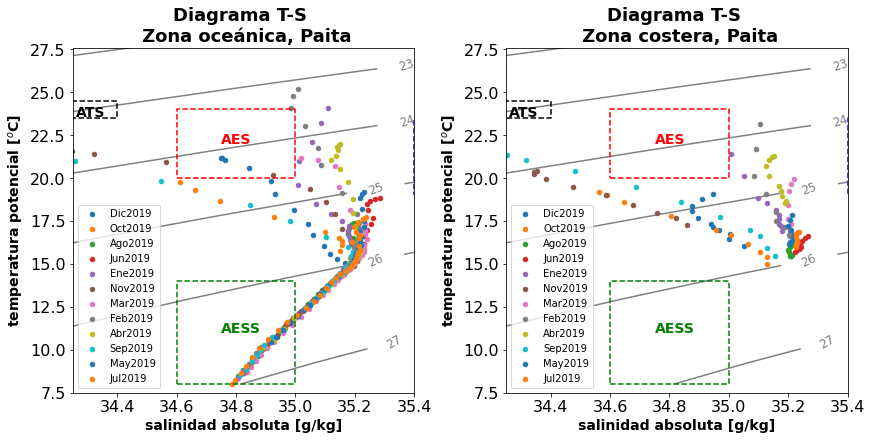

In [81]:
file = glob.glob("./Resultados_Paita_2019/*")

Tg, Sg = np.meshgrid(np.linspace(8, 29, num=18), np.linspace(33.5, 36, num=25))
sigma_theta = gsw.sigma0(Sg, Tg)
cnt = np.linspace(sigma_theta.min(), sigma_theta.max(),156)
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,6), constrained_layout=True)

cs = ax1.contour(Sg, Tg, sigma_theta, colors="grey", zorder=1)
ax1.clabel(cs, inline=True, fontsize=12)
ax1.set_title("Diagrama T-S \n Zona oceánica, Paita", fontsize=18, fontweight="bold")
ax1.set_xlabel("salinidad absoluta [g/kg]", fontweight="bold", size=14)
ax1.set_ylabel("temperatura potencial [$^{o}$C]", fontweight="bold", size=14)
ax1.tick_params(axis="both", labelsize=16)
ax1.plot([33.5, 34.4, 34.4, 33.5, 33.5],[23.5, 23.5, 24.5, 24.5, 23.5],"k--")    
ax1.plot([34.6, 35, 35, 34.6, 34.6],[20, 20, 24, 24, 20],"r--")
ax1.plot([35.4, 40, 40, 35.4, 35.4],[19, 19, 23.5, 23.5, 19],"b--")
ax1.plot([34.6, 35, 35, 34.6, 34.6],[8, 8, 14, 14, 8],"g--")
ax1.set_xlim(34.25,35.4)
ax1.set_ylim(7.5,27.6)
ax1.text(34.26,23.6,"ATS",fontsize=14, fontweight="bold", color="k")
ax1.text(34.75,22,"AES",fontsize=14, fontweight="bold", color="r")
ax1.text(34.75,11,"AESS",fontsize=14, fontweight="bold", color="g")

cs = ax2.contour(Sg, Tg, sigma_theta, colors="grey", zorder=1)
ax2.clabel(cs, inline=True, fontsize=12)
ax2.set_title("Diagrama T-S \n Zona costera, Paita", fontsize=18, fontweight="bold")
ax2.set_xlabel("salinidad absoluta [g/kg]", fontweight="bold", size=14)
ax2.set_ylabel("temperatura potencial [$^{o}$C]", fontweight="bold", size=14)
ax2.tick_params(axis="both", labelsize=16)
ax2.plot([33.5, 34.4, 34.4, 33.5, 33.5],[23.5, 23.5, 24.5, 24.5, 23.5],"k--")    
ax2.plot([34.6, 35, 35, 34.6, 34.6],[20, 20, 24, 24, 20],"r--")
ax2.plot([35.4, 40, 40, 35.4, 35.4],[19, 19, 23.5, 23.5, 19],"b--")
ax2.plot([34.6, 35, 35, 34.6, 34.6],[8, 8, 14, 14, 8],"g--")
ax2.set_xlim(34.25,35.4)
ax2.set_ylim(7.5,27.6)
ax2.text(34.26,23.6,"ATS",fontsize=14, fontweight="bold", color="k")
ax2.text(34.75,22,"AES",fontsize=14, fontweight="bold", color="r")
ax2.text(34.75,11,"AESS",fontsize=14, fontweight="bold", color="g")

for j in range(len(file)):
    excel_data = pd.read_excel(file[j]) # load excel data
    data = pd.DataFrame(excel_data, columns=["Prof", "T Pot", "SalAbs"]) #read specyfic variables
    adata = data.to_numpy() # passing to numpy ndarray
    val = np.where(adata[:,0] == 0)[0] # choosing 0-index
    num = sum(adata[:,0] == 0) # number of 0s
    ntemp = np.zeros((40,num))*np.nan # creating a nan-array for temperature
    nsalt = np.zeros((40,num))*np.nan # creating a nan-array for salinity
    
    for i in range(num):
        if i != num-1:
            n = len(adata[val[i]:val[i+1]-1,0])
            ntemp[0:n,i] = adata[val[i]:val[i+1]-1,1]
            nsalt[0:n,i] = adata[val[i]:val[i+1]-1,2]
        else:
            n = len(adata[val[i]:,0])
            ntemp[0:n,i] = adata[val[i]:,1]
            nsalt[0:n,i] = adata[val[i]:,2]
    #print(ntemp)
    temp_oce = np.mean(ntemp[:,:4],axis=1)
    temp_cos = np.mean(ntemp[:,-3:],axis=1)
    salt_oce = np.mean(nsalt[:,:4],axis=1)
    salt_cos = np.mean(nsalt[:,-3:],axis=1)
    
    ax1.scatter(salt_oce, temp_oce, s = 20, label=str(file[j][29:36]))
    ax1.legend(loc = "lower left")

    ax2.scatter(salt_cos, temp_cos, s = 20, label=str(file[j][29:36]))
    ax2.legend(loc = "lower left")

plt.savefig("./TS_diagram_Paita_2019.png", dpi=200)

## datos 2016

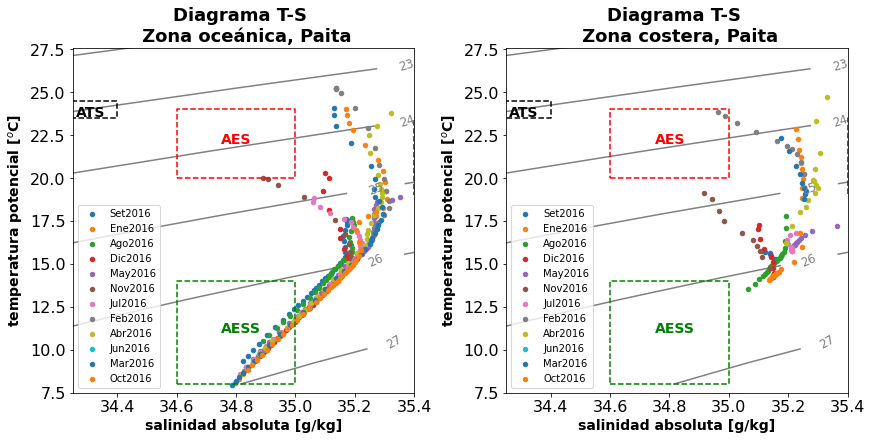

In [80]:
file = glob.glob("./Resultados_2014_2016_Paita/2016/*")

Tg, Sg = np.meshgrid(np.linspace(8, 29, num=18), np.linspace(33.5, 36, num=25))
sigma_theta = gsw.sigma0(Sg, Tg)
cnt = np.linspace(sigma_theta.min(), sigma_theta.max(),156)
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,6), constrained_layout=True)

cs = ax1.contour(Sg, Tg, sigma_theta, colors="grey", zorder=1)
ax1.clabel(cs, inline=True, fontsize=12)
ax1.set_title("Diagrama T-S \n Zona oceánica, Paita", fontsize=18, fontweight="bold")
ax1.set_xlabel("salinidad absoluta [g/kg]", fontweight="bold", size=14)
ax1.set_ylabel("temperatura potencial [$^{o}$C]", fontweight="bold", size=14)
ax1.tick_params(axis="both", labelsize=16)
ax1.plot([33.5, 34.4, 34.4, 33.5, 33.5],[23.5, 23.5, 24.5, 24.5, 23.5],"k--")    
ax1.plot([34.6, 35, 35, 34.6, 34.6],[20, 20, 24, 24, 20],"r--")
ax1.plot([35.4, 40, 40, 35.4, 35.4],[19, 19, 23.5, 23.5, 19],"b--")
ax1.plot([34.6, 35, 35, 34.6, 34.6],[8, 8, 14, 14, 8],"g--")
ax1.set_xlim(34.25,35.4)
ax1.set_ylim(7.5,27.6)
ax1.text(34.26,23.6,"ATS",fontsize=14, fontweight="bold", color="k")
ax1.text(34.75,22,"AES",fontsize=14, fontweight="bold", color="r")
ax1.text(34.75,11,"AESS",fontsize=14, fontweight="bold", color="g")

cs = ax2.contour(Sg, Tg, sigma_theta, colors="grey", zorder=1)
ax2.clabel(cs, inline=True, fontsize=12)
ax2.set_title("Diagrama T-S \n Zona costera, Paita", fontsize=18, fontweight="bold")
ax2.set_xlabel("salinidad absoluta [g/kg]", fontweight="bold", size=14)
ax2.set_ylabel("temperatura potencial [$^{o}$C]", fontweight="bold", size=14)
ax2.tick_params(axis="both", labelsize=16)
ax2.plot([33.5, 34.4, 34.4, 33.5, 33.5],[23.5, 23.5, 24.5, 24.5, 23.5],"k--")    
ax2.plot([34.6, 35, 35, 34.6, 34.6],[20, 20, 24, 24, 20],"r--")
ax2.plot([35.4, 40, 40, 35.4, 35.4],[19, 19, 23.5, 23.5, 19],"b--")
ax2.plot([34.6, 35, 35, 34.6, 34.6],[8, 8, 14, 14, 8],"g--")
ax2.set_xlim(34.25,35.4)
ax2.set_ylim(7.5,27.6)
ax2.text(34.26,23.6,"ATS",fontsize=14, fontweight="bold", color="k")
ax2.text(34.75,22,"AES",fontsize=14, fontweight="bold", color="r")
ax2.text(34.75,11,"AESS",fontsize=14, fontweight="bold", color="g")

for j in range(len(file)):
    excel_data = pd.read_excel(file[j]) # load excel data
    data = pd.DataFrame(excel_data, columns=["Prof", "T Pot", "SalAbs"]) #read specyfic variables
    adata = data.to_numpy() # passing to numpy ndarray
    val = np.where(adata[:,0] == 0)[0] # choosing 0-index
    num = sum(adata[:,0] == 0) # number of 0s
    ntemp = np.zeros((40,num))*np.nan # creating a nan-array for temperature
    nsalt = np.zeros((40,num))*np.nan # creating a nan-array for salinity
    
    for i in range(num):
        if i != num-1:
            n = len(adata[val[i]:val[i+1]-1,0])
            ntemp[0:n,i] = adata[val[i]:val[i+1]-1,1]
            nsalt[0:n,i] = adata[val[i]:val[i+1]-1,2]
        else:
            n = len(adata[val[i]:,0])
            ntemp[0:n,i] = adata[val[i]:,1]
            nsalt[0:n,i] = adata[val[i]:,2]
    #print(ntemp[:,4:])
    temp_oce = np.mean(ntemp[:,:4],axis=1)
    temp_cos = np.mean(ntemp[:,4:],axis=1)
    salt_oce = np.mean(nsalt[:,:4],axis=1)
    salt_cos = np.mean(nsalt[:,4:],axis=1)
    
    ax1.scatter(salt_oce, temp_oce, s = 20, label=str(file[j][39:39+7]))
    ax1.legend(loc = "lower left")

    ax2.scatter(salt_cos, temp_cos, s = 20, label=str(file[j][39:39+7]))
    ax2.legend(loc = "lower left")

plt.savefig("./TS_diagram_Paita_2016.png", dpi=200)

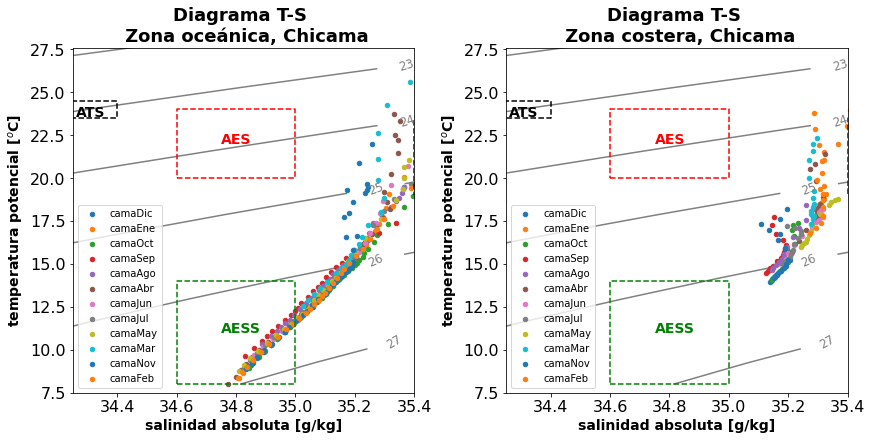

In [85]:
file = glob.glob("./Resultados_2014_2016_Chicama/2016/*")

Tg, Sg = np.meshgrid(np.linspace(8, 29, num=18), np.linspace(33.5, 36, num=25))
sigma_theta = gsw.sigma0(Sg, Tg)
cnt = np.linspace(sigma_theta.min(), sigma_theta.max(),156)
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,6), constrained_layout=True)

cs = ax1.contour(Sg, Tg, sigma_theta, colors="grey", zorder=1)
ax1.clabel(cs, inline=True, fontsize=12)
ax1.set_title("Diagrama T-S \n Zona oceánica, Chicama", fontsize=18, fontweight="bold")
ax1.set_xlabel("salinidad absoluta [g/kg]", fontweight="bold", size=14)
ax1.set_ylabel("temperatura potencial [$^{o}$C]", fontweight="bold", size=14)
ax1.tick_params(axis="both", labelsize=16)
ax1.plot([33.5, 34.4, 34.4, 33.5, 33.5],[23.5, 23.5, 24.5, 24.5, 23.5],"k--")    
ax1.plot([34.6, 35, 35, 34.6, 34.6],[20, 20, 24, 24, 20],"r--")
ax1.plot([35.4, 40, 40, 35.4, 35.4],[19, 19, 23.5, 23.5, 19],"b--")
ax1.plot([34.6, 35, 35, 34.6, 34.6],[8, 8, 14, 14, 8],"g--")
ax1.set_xlim(34.25,35.4)
ax1.set_ylim(7.5,27.6)
ax1.text(34.26,23.6,"ATS",fontsize=14, fontweight="bold", color="k")
ax1.text(34.75,22,"AES",fontsize=14, fontweight="bold", color="r")
ax1.text(34.75,11,"AESS",fontsize=14, fontweight="bold", color="g")

cs = ax2.contour(Sg, Tg, sigma_theta, colors="grey", zorder=1)
ax2.clabel(cs, inline=True, fontsize=12)
ax2.set_title("Diagrama T-S \n Zona costera, Chicama", fontsize=18, fontweight="bold")
ax2.set_xlabel("salinidad absoluta [g/kg]", fontweight="bold", size=14)
ax2.set_ylabel("temperatura potencial [$^{o}$C]", fontweight="bold", size=14)
ax2.tick_params(axis="both", labelsize=16)
ax2.plot([33.5, 34.4, 34.4, 33.5, 33.5],[23.5, 23.5, 24.5, 24.5, 23.5],"k--")    
ax2.plot([34.6, 35, 35, 34.6, 34.6],[20, 20, 24, 24, 20],"r--")
ax2.plot([35.4, 40, 40, 35.4, 35.4],[19, 19, 23.5, 23.5, 19],"b--")
ax2.plot([34.6, 35, 35, 34.6, 34.6],[8, 8, 14, 14, 8],"g--")
ax2.set_xlim(34.25,35.4)
ax2.set_ylim(7.5,27.6)
ax2.text(34.26,23.6,"ATS",fontsize=14, fontweight="bold", color="k")
ax2.text(34.75,22,"AES",fontsize=14, fontweight="bold", color="r")
ax2.text(34.75,11,"AESS",fontsize=14, fontweight="bold", color="g")

for j in range(len(file)):
    excel_data = pd.read_excel(file[j]) # load excel data
    data = pd.DataFrame(excel_data, columns=["Prof", "T Pot", "SalAbs"]) #read specyfic variables
    adata = data.to_numpy() # passing to numpy ndarray
    val = np.where(adata[:,0] == 0)[0] # choosing 0-index
    num = sum(adata[:,0] == 0) # number of 0s
    ntemp = np.zeros((40,num))*np.nan # creating a nan-array for temperature
    nsalt = np.zeros((40,num))*np.nan # creating a nan-array for salinity
    
    for i in range(num):
        if i != num-1:
            n = len(adata[val[i]:val[i+1]-1,0])
            ntemp[0:n,i] = adata[val[i]:val[i+1]-1,1]
            nsalt[0:n,i] = adata[val[i]:val[i+1]-1,2]
        else:
            n = len(adata[val[i]:,0])
            ntemp[0:n,i] = adata[val[i]:,1]
            nsalt[0:n,i] = adata[val[i]:,2]
    #print(ntemp)
    temp_oce = np.mean(ntemp[:,:2],axis=1)
    temp_cos = np.mean(ntemp[:,-2:],axis=1)
    salt_oce = np.mean(nsalt[:,:2],axis=1)
    salt_cos = np.mean(nsalt[:,-2:],axis=1)
    
    ax1.scatter(salt_oce, temp_oce, s = 20, label=str(file[j][39:39+7]))
    ax1.legend(loc = "lower left")

    ax2.scatter(salt_cos, temp_cos, s = 20, label=str(file[j][39:39+7]))
    ax2.legend(loc = "lower left")

plt.savefig("./TS_diagram_Chicama_2016.png", dpi=200)

## diagrama T-S mensual para la climatología 2014-2019

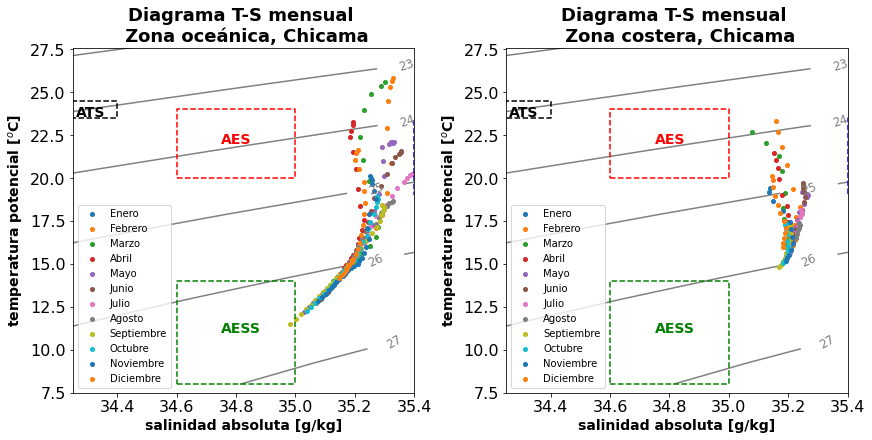

In [219]:
Tg, Sg = np.meshgrid(np.linspace(8, 29, num=18), np.linspace(33.5, 36, num=25))
sigma_theta = gsw.sigma0(Sg, Tg)
cnt = np.linspace(sigma_theta.min(), sigma_theta.max(),156)
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,6), constrained_layout=True)

cs = ax1.contour(Sg, Tg, sigma_theta, colors="grey", zorder=1)
ax1.clabel(cs, inline=True, fontsize=12)
ax1.set_title("Diagrama T-S mensual \n Zona oceánica, Chicama", fontsize=18, fontweight="bold")
ax1.set_xlabel("salinidad absoluta [g/kg]", fontweight="bold", size=14)
ax1.set_ylabel("temperatura potencial [$^{o}$C]", fontweight="bold", size=14)
ax1.tick_params(axis="both", labelsize=16)
ax1.plot([33.5, 34.4, 34.4, 33.5, 33.5],[23.5, 23.5, 24.5, 24.5, 23.5],"k--")    
ax1.plot([34.6, 35, 35, 34.6, 34.6],[20, 20, 24, 24, 20],"r--")
ax1.plot([35.4, 40, 40, 35.4, 35.4],[19, 19, 23.5, 23.5, 19],"b--")
ax1.plot([34.6, 35, 35, 34.6, 34.6],[8, 8, 14, 14, 8],"g--")
ax1.set_xlim(34.25,35.4)
ax1.set_ylim(7.5,27.6)
ax1.text(34.26,23.6,"ATS",fontsize=14, fontweight="bold", color="k")
ax1.text(34.75,22,"AES",fontsize=14, fontweight="bold", color="r")
ax1.text(34.75,11,"AESS",fontsize=14, fontweight="bold", color="g")

cs = ax2.contour(Sg, Tg, sigma_theta, colors="grey", zorder=1)
ax2.clabel(cs, inline=True, fontsize=12)
ax2.set_title("Diagrama T-S mensual \n Zona costera, Chicama", fontsize=18, fontweight="bold")
ax2.set_xlabel("salinidad absoluta [g/kg]", fontweight="bold", size=14)
ax2.set_ylabel("temperatura potencial [$^{o}$C]", fontweight="bold", size=14)
ax2.tick_params(axis="both", labelsize=16)
ax2.plot([33.5, 34.4, 34.4, 33.5, 33.5],[23.5, 23.5, 24.5, 24.5, 23.5],"k--")    
ax2.plot([34.6, 35, 35, 34.6, 34.6],[20, 20, 24, 24, 20],"r--")
ax2.plot([35.4, 40, 40, 35.4, 35.4],[19, 19, 23.5, 23.5, 19],"b--")
ax2.plot([34.6, 35, 35, 34.6, 34.6],[8, 8, 14, 14, 8],"g--")
ax2.set_xlim(34.25,35.4)
ax2.set_ylim(7.5,27.6)
ax2.text(34.26,23.6,"ATS",fontsize=14, fontweight="bold", color="k")
ax2.text(34.75,22,"AES",fontsize=14, fontweight="bold", color="r")
ax2.text(34.75,11,"AESS",fontsize=14, fontweight="bold", color="g")

months = ["Enero","Febrero","Marzo","Abril","Mayo","Junio","Julio","Agosto","Septiembre",
          "Octubre","Noviembre","Diciembre"]
for i in range(12):
    month=str(i+1).zfill(2)
    file = glob.glob("/home/user/Downloads/DatosPaitaChicama_DA26Dic2022/climatologico/chicama/"+str(month)+"/*")
    q_temp_oce, q_temp_cos, q_salt_oce, q_salt_cos = 0, 0, 0, 0
    for j in range(len(file)):
        excel_data = pd.read_excel(file[j]) # load excel data
        data = pd.DataFrame(excel_data, columns=["Prof", "T Pot", "SalAbs"]) #read specyfic variables
        adata = data.to_numpy() # passing to numpy ndarray
        val = np.where(adata[:,0] == 0)[0] # choosing 0-index
        num = sum(adata[:,0] == 0) # number of 0s
        ntemp = np.zeros((40,num))*np.nan # creating a nan-array for temperature
        nsalt = np.zeros((40,num))*np.nan # creating a nan-array for salinity 
        nprof = np.zeros((40,num))*np.nan # creating a nan-array for depth 
        temp_oce, salt_oce, temp_cos, salt_cos = 0, 0, 0, 0
        h_oce, h_cos = 0, 0
        for k in range(num):
            if k != num-1:
                n = len(adata[val[k]:val[k+1]-1,0])
                ntemp[0:n,k] = adata[val[k]:val[k+1]-1,1]
                nsalt[0:n,k] = adata[val[k]:val[k+1]-1,2]
                nprof[0:n,k] = adata[val[k]:val[k+1]-1,0]
            else:
                n = len(adata[val[k]:,0])
                ntemp[0:n,k] = adata[val[k]:,1]
                nsalt[0:n,k] = adata[val[k]:,2]
                nprof[0:n,k] = adata[val[k]:,0]
            if (max(nprof[:,k]) > 160):                
                temp_oce = ntemp[:,k]+ temp_oce
                salt_oce = nsalt[:,k]+ salt_oce
                h_oce = h_oce+1
            else:
                temp_cos = ntemp[:,k]+ temp_cos
                salt_cos = nsalt[:,k]+ salt_cos
                h_cos = h_cos+1                  
        if h_cos != 0:
            temp_cos, salt_cos = temp_cos/h_cos, salt_cos/h_cos
        if h_oce != 0:
            temp_oce, salt_oce = temp_oce/h_oce, salt_oce/h_oce
        q_temp_oce = q_temp_oce+temp_oce
        q_temp_cos = q_temp_cos+temp_cos
        q_salt_oce = q_salt_oce+salt_oce
        q_salt_cos = q_salt_cos+salt_cos

    ax1.scatter(q_salt_oce/len(file), q_temp_oce/len(file), s = 16, label=str(months[i]))
    ax1.legend(loc = "lower left")
    ax2.scatter(q_salt_cos/len(file), q_temp_cos/len(file), s = 16, label=str(months[i]))
    ax2.legend(loc = "lower left")

plt.savefig("./TS_diagram_climatology_Chicama.png", dpi=200)